<a href="https://colab.research.google.com/github/dayanaviana/WGU/blob/main/207-DataExploration_Project/CHURN_3_tests_chi_square_categorical_categorical_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chi-Squared test
## Used to verify relashionship between two categorical groups

H0: NO statistic significant difference between groups

H1: Correlation exists

    
    If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
    If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.
    
    If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
    If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.


# Cross tabulation and Chi-square Tests




 Churn & Techie

 Chi-square: statistic=44.115 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 
 Reject H0. Features are Dependent! 

Cross tab:
Churn     No   Yes
Techie            
No      6226  2095
Yes     1124   555




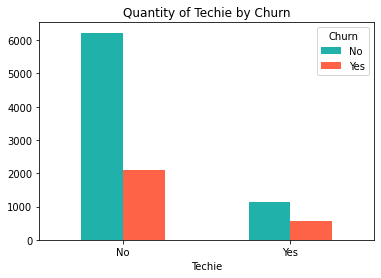




 Churn & Multiple

 Chi-square: statistic=173.038 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 
 Reject H0. Features are Dependent! 

Cross tab:
Churn       No   Yes
Multiple            
No        4253  1139
Yes       3097  1511




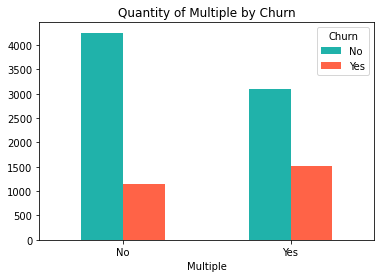




 Churn & OnlineBackup

 Chi-square: statistic=25.282 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 
 Reject H0. Features are Dependent! 

Cross tab:
Churn           No   Yes
OnlineBackup            
No            4149  1345
Yes           3201  1305




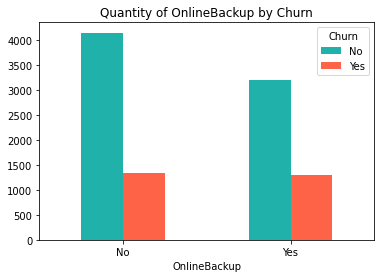




 Churn & DeviceProtection

 Chi-square: statistic=31.653 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 
 Reject H0. Features are Dependent! 

Cross tab:
Churn               No   Yes
DeviceProtection            
No                4250  1364
Yes               3100  1286




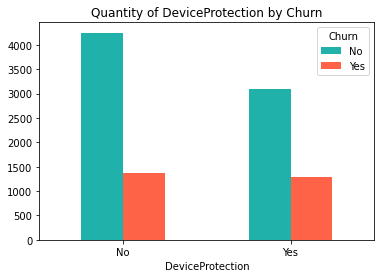




 Churn & StreamingTV

 Chi-square: statistic=528.652 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 
 Reject H0. Features are Dependent! 

Cross tab:
Churn          No   Yes
StreamingTV            
No           4235   836
Yes          3115  1814




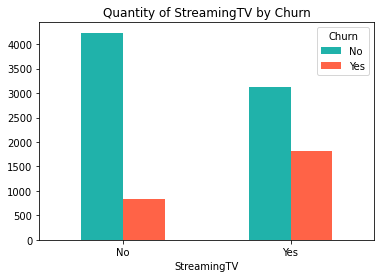




 Churn & StreamingMovies

 Chi-square: statistic=835.414 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 
 Reject H0. Features are Dependent! 

Cross tab:
Churn              No   Yes
StreamingMovies            
No               4394   716
Yes              2956  1934




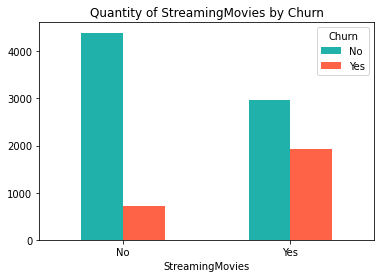






 Churn & Contract

 Chi-square: statistic=718.592 p-value=0.000 Degrees_of_Freedom=2 Critical_Value:9.210 
 Reject H0. Features are Dependent! 

Cross tab:
Churn             No   Yes
Contract                  
Month-to-month  3422  2034
One year        1795   307
Two Year        2133   309




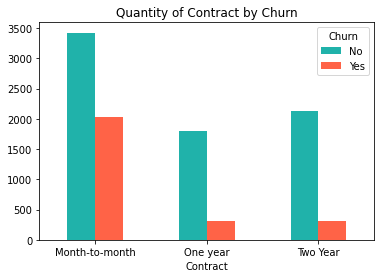


SUMMARY: 
These features are dependent
{
    "Churn & Multiple": "Chi-square: statistic=173.038 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 ",
    "Churn & OnlineBackup": "Chi-square: statistic=25.282 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 ",
    "Churn & DeviceProtection": "Chi-square: statistic=31.653 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 ",
    "Churn & Techie": "Chi-square: statistic=44.115 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 ",
    "Churn & StreamingTV": "Chi-square: statistic=528.652 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 ",
    "Churn & Contract": "Chi-square: statistic=718.592 p-value=0.000 Degrees_of_Freedom=2 Critical_Value:9.210 ",
    "Churn & StreamingMovies": "Chi-square: statistic=835.414 p-value=0.000 Degrees_of_Freedom=1 Critical_Value:6.635 "
}


In [6]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# import churn_clean into data frame
docId= "1-WjyGAwXhgkEMSGk1PHKMjIASkVgn-YO"
googleDriveFile = "https://docs.google.com/uc?id="+docId+"&export=download"
df = pd.read_csv(googleDriveFile, index_col=0)

categorical_columns = [
                 "Techie",
                 "Multiple",
                 "OnlineBackup",
                 "DeviceProtection",
                 "StreamingTV",
                 "StreamingMovies",
                 "TechSupport",
                 "Contract"
                 ]
myDictionaty = dict()
# Compare every feature with each other
for index, column_name in enumerate(categorical_columns):
    print("\n")
    sub_column_name = "Churn"
    features = sub_column_name + " & " + column_name
          
    # Cross tabulation
    crossTab = pd.crosstab(index=df[column_name], columns=df[sub_column_name])

    #Performing Chi-square test
    # H0: NO statistic significant difference between groups
    # H1: Correlation exists
    statistic, pValue, dof, expected = stats.chi2_contingency(crossTab)

    #Interpret test-statistic
    prob = 0.99
    critical = stats.chi2.ppf(prob, dof)
    # statistic measure distance between observed and expected frequencies
    if abs(statistic) >= critical:
      h1_t_statistics = True
    else:
      h1_t_statistics = False

    #print('interpret p-value')
    alpha = 1.0 - prob
    #P-value is the probability of H0 being true
    if pValue <= alpha: # Accept H1
      h1_p_value = True
    else:
      h1_p_value = False

    if (h1_t_statistics & h1_p_value):
      print("\n",features)

      chi = 'Chi-square: statistic=%.3f p-value=%.3f Degrees_of_Freedom=%d Critical_Value:%.3f ' % ( statistic, pValue, dof, critical)
      print('\n',chi)
      print(' Reject H0. Features are Dependent! ')

      print('\nCross tab:')
      print(crossTab)
      print('\n')

      key = features
      myDictionaty[key] = chi

      # Bar Graph
      barGraph = crossTab.plot.bar( 
                          # stacked=True,
                          color=['lightseagreen','tomato'], 
                          figsize=(6,4))

      barGraph.set_title('Quantity of ' + str(column_name) + ' by Churn')
      barGraph.set_xticklabels(crossTab.index, rotation=0)
      plt.show()

print("\nSUMMARY: \nThese features are dependent")
myDictionaty_sorted = dict(sorted(myDictionaty.items(), key=lambda item: item[1]))
# Print dictionary as json format
import json
print(json.dumps(myDictionaty_sorted, indent=4))
